### 8. Implement CNN operation to darken the Image. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample grayscale image
image = np.array([[10, 20, 30, 40, 50],
                  [60, 70, 80, 90, 100],
                  [110, 120, 130, 140, 150],
                  [160, 170, 180, 190, 200],
                  [210, 220, 230, 240, 250]], dtype=np.uint8)

In [2]:
# Darkening filter
darkening_filter = np.array([[-1, 0, 0],
                             [0, 0.5, 0],
                             [0, 0, -1]])
darken_image = cv2.filter2D(image, -1, darkening_filter)

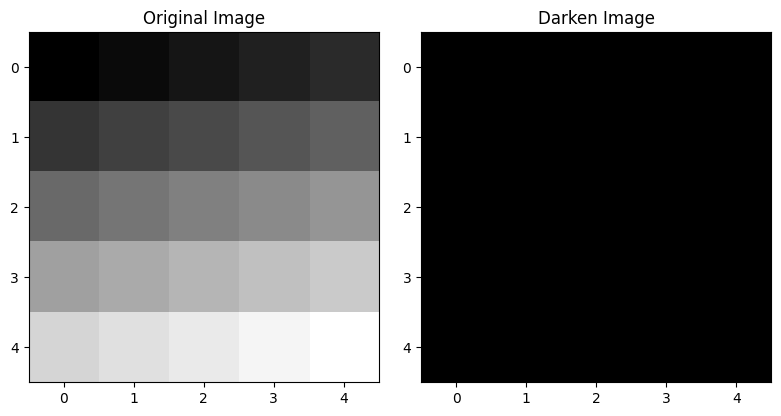

In [4]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(darken_image, cmap='gray')
plt.title('Darken Image')

plt.tight_layout()
plt.show()

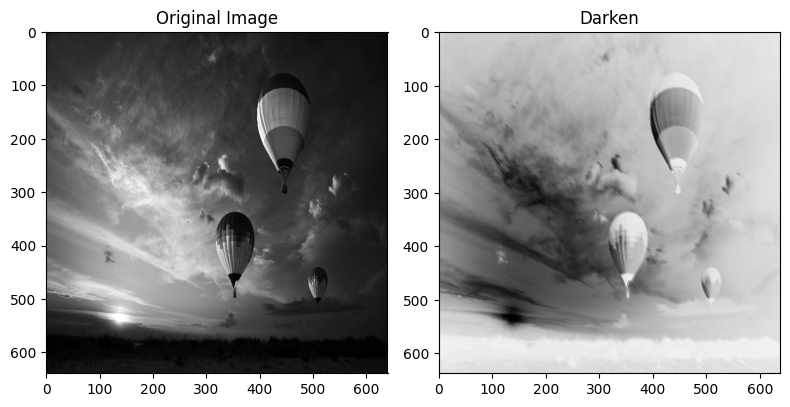

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Load the image using cv2.imread
image_path = "cnn_image.jpg"  # Replace with the actual image path
image_cv2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Check if the image is loaded successfully
if image_cv2 is None:
    print("Error: Unable to load the image.")
    exit()

# Resize the image to 640x640
image_resized = cv2.resize(image_cv2, (640, 640))

# Reshape the image to match the expected input shape for convolution
image = image_resized.reshape(1, 640, 640, 1)

darkening_filter = np.array([[-1, 0, 0],
                             [0, 0.5, 0],
                             [0, 0, -1]])

# Create TensorFlow constants for the image and the filter
image_tensor = tf.constant(image, dtype=np.float32)
filter_tensor = tf.constant(darkening_filter.reshape(3, 3, 1, 1), dtype=tf.float32)

# Perform convolution with the smoothing filter and display the results
convolution = tf.nn.conv2d(image_tensor, filter_tensor, strides=1, padding='VALID')

# Display the original image and the smoothed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(convolution.numpy().squeeze(), cmap='gray')
plt.title('Darken')

plt.tight_layout()
plt.show()